# Name: Omkar Patil
# Roll No: 28

# Multivariable Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


In [3]:
df = pd.read_csv("house_cleaned.csv")

In [4]:
df

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,house,bptp visionnaire,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),5,4,3+,servant room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3.0,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,house,independent,5.70,105751.0,539.0,Plot area 539(50.07 sq.m.),5,4,2,"store room,pooja room,servant room","Sector 21A Faridabad, Gurgaon, Haryana",2.0,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,house,independent,2.10,38251.0,549.0,Plot area 61(51 sq.m.),10,10,3+,servant room,"Sushant Lok Phase 1, Gurgaon, Haryana",5.0,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,house,independent,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",5.0,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,house,independent,3.00,53763.0,558.0,Plot area 62(51.84 sq.m.),12,12,3+,others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5.0,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,4 Bedroom House for sale in Sector 26 Gurgaon,house,dlf city phase 1,5.50,30556.0,1800.0,Plot area 200(167.23 sq.m.),4,4,3,"pooja room,study room,servant room","Sector 26 Gurgaon, Gurgaon, Haryana",2.0,North-East,5 to 10 Year Old,"['Dlf phase 1 metro station', 'Sikandarpur met...","Residential house, g block, dlf phase-1, gurga...","['10 Light', 'No AC', 'No Bed', 'No Chimney', ...","['Feng Shui / Vaastu Compliant', 'High Ceiling...",NaN
960,3 Bedroom House for sale in DLF Phase 2,house,dlf city plots phase 2,4.25,31481.0,1350.0,Plot area 150(125.42 sq.m.),3,2,3,study room,"DLF Phase 2, Gurgaon, Haryana",2.0,North,10+ Year Old,"['Sahara Mall', 'Delhi Public School', 'Privat...","Residential house, k block, dlf phase-2, gurga...",NaN,"['High Ceiling Height', 'Maintenance Staff', '...","['Environment5 out of 5', 'Safety5 out of 5', ..."
961,3 Bedroom House for sale in Sector 26 Gurgaon,house,dlf city phase 1,4.50,33333.0,1350.0,Plot area 150(125.42 sq.m.),3,3,2,"study room,servant room","Sector 26 Gurgaon, Gurgaon, Haryana",2.0,East,5 to 10 Year Old,"['Dlf phase 1 metro station', 'Sikandarpur met...","Residential house, e block 150 sq.Yds , dlf ph...","['6 Fan', '20 Light', 'No AC', 'No Bed', 'No C...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN
962,3 Bedroom House for sale in Sector 26 Gurgaon,house,dlf city phase 1,3.25,33129.0,981.0,Plot area 109(91.14 sq.m.),3,3,3,study room,"Sector 26 Gurgaon, Gurgaon, Haryana",2.0,West,

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    964 non-null    object 
 1   property_type    964 non-null    object 
 2   society          964 non-null    object 
 3   price            945 non-null    float64
 4   price_per_sqft   945 non-null    float64
 5   area             945 non-null    float64
 6   areaWithType     964 non-null    object 
 7   bedRoom          964 non-null    int64  
 8   bathroom         964 non-null    int64  
 9   balcony          964 non-null    object 
 10  additionalRoom   964 non-null    object 
 11  address          959 non-null    object 
 12  floorNum         945 non-null    float64
 13  facing           661 non-null    object 
 14  agePossession    964 non-null    object 
 15  nearbyLocations  848 non-null    object 
 16  description      964 non-null    object 
 17  furnishDetails  

In [6]:
df.select_dtypes(include=int)

,bedRoom,bathroom
0,5,4
1,5,4
2,10,10
3,21,21
4,12,12
...,...,...
959,4,4
960,3,2
961,3,3
962,3,3


In [7]:
df.select_dtypes(include=float)

,price,price_per_sqft,area,floorNum
0,5.25,20115.0,2610.0,3.0
1,5.70,105751.0,539.0,2.0
2,2.10,38251.0,549.0,5.0
3,5.00,43066.0,1161.0,5.0
4,3.00,53763.0,558.0,5.0
...,...,...,...,...
959,5.50,30556.0,1800.0,2.0
960,4.25,31481.0,1350.0,2.0
961,4.50,33333.0,1350.0,2.0
962,3.25,33129.0,981.0,2.0


In [8]:
df.select_dtypes(include=object)

,property_name,property_type,society,areaWithType,balcony,additionalRoom,address,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,house,bptp visionnaire,Plot area 290(242.48 sq.m.),3+,servant room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,house,independent,Plot area 539(50.07 sq.m.),2,"store room,pooja room,servant room","Sector 21A Faridabad, Gurgaon, Haryana",NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,house,independent,Plot area 61(51 sq.m.),3+,servant room,"Sushant Lok Phase 1, Gurgaon, Haryana",West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,house,independent,Plot area 129(107.86 sq.m.),3+,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,house,independent,Plot area 62(51.84 sq.m.),3+,others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,4 Bedroom House for sale in Sector 26 Gurgaon,house,dlf city phase 1,Plot area 200(167.23 sq.m.),3,"pooja room,study room,servant room","Sector 26 Gurgaon, Gurgaon, Haryana",North-East,5 to 10 Year Old,"['Dlf phase 1 metro station', 'Sikandarpur met...","Residential house, g block, dlf phase-1, gurga...","['10 Light', 'No AC', 'No Bed', 'No Chimney', ...","['Feng Shui / Vaastu Compliant', 'High Ceiling...",NaN
960,3 Bedroom House for sale in DLF Phase 2,house,dlf city plots phase 2,Plot area 150(125.42 sq.m.),3,study room,"DLF Phase 2, Gurgaon, Haryana",North,10+ Year Old,"['Sahara Mall', 'Delhi Public School', 'Privat...","Residential house, k block, dlf phase-2, gurga...",NaN,"['High Ceiling Height', 'Maintenance Staff', '...","['Environment5 out of 5', 'Safety5 out of 5', ..."
961,3 Bedroom House for sale in Sector 26 Gurgaon,house,dlf city phase 1,Plot area 150(125.42 sq.m.),2,"study room,servant room","Sector 26 Gurgaon, Gurgaon, Haryana",East,5 to 10 Year Old,"['Dlf phase 1 metro station', 'Sikandarpur met...","Residential house, e block 150 sq.Yds , dlf ph...","['6 Fan', '20 Light', 'No AC', 'No Bed', 'No C...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN
962,3 Bedroom House for sale in Sector 26 Gurgaon,house,dlf city phase 1,Plot area 109(91.14 sq.m.),3,study room,"Sector 26 Gurgaon, Gurgaon, Haryana",West,10+ Year Old,"['Dlf phase 1 metro station', 'Sikandarpur met...","Residential house, e block, dlf phase-1, gurga...","['5 Fan', '16 Light', 'No AC', 'No Bed', 'No C...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN


In [9]:
df.isnull()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
960,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
961,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
962,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [10]:
print(df.isnull().sum())

property_name        0
property_type        0
society              0
price               19
price_per_sqft      19
area                19
areaWithType         0
bedRoom              0
bathroom             0
balcony              0
additionalRoom       0
address              5
floorNum            19
facing             303
agePossession        0
nearbyLocations    116
description          0
furnishDetails     235
features           302
rating             121
dtype: int64


In [11]:
df.describe()

,price,price_per_sqft,area,bedRoom,bathroom,floorNum
count,945.000000,945.000000,9.450000e+02,964.000000,964.000000,945.000000
mean,4.911069,28251.213757,1.055610e+04,5.117220,4.825726,2.759788
std,4.651008,42849.177326,2.359139e+05,3.253843,3.350535,2.923544
min,0.070000,2.000000,4.500000e+01,1.000000,1.000000,0.000000
25%,1.200000,10085.000000,9.500000e+02,3.000000,3.000000,2.000000
50%,3.600000,19231.000000,1.809000e+03,4.000000,4.000000,2.000000
75%,7.000000,30247.000000,3.191000e+03,6.000000,6.000000,3.000000
max,31.500000,600000.000000,7.250000e+06,36.000000,36.000000,51.000000


In [12]:
df.select_dtypes(include=['number']).corr()

,price,price_per_sqft,area,bedRoom,bathroom,floorNum
price,1.000000,0.231256,-0.017771,0.280496,0.418193,0.059957
price_per_sqft,0.231256,1.000000,-0.024669,0.137059,0.150400,0.037536
area,-0.017771,-0.024669,1.000000,-0.007979,-0.014003,0.003102
bedRoom,0.280496,0.137059,-0.007979,1.000000,0.921415,0.143649
bathroom,0.418193,0.150400,-0.014003,0.921415,1.000000,0.163132
floorNum,0.059957,0.037536,0.003102,0.143649,0.163132,1.000000


In [13]:
import numpy as np

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.shape[0], outliers

outlier_counts = {}
outlier_details = {}

for col in ["price", "price_per_sqft", "area", "floorNum", "bedRoom", "bathroom"]:
    count, details = detect_outliers_iqr(df, col)
    outlier_counts[col] = count
    outlier_details[col] = details

outlier_counts


{'price': 36,
 'price_per_sqft': 57,
 'area': 36,
 'floorNum': 35,
 'bedRoom': 55,
 'bathroom': 53}

<Axes: ylabel='bedRoom'>

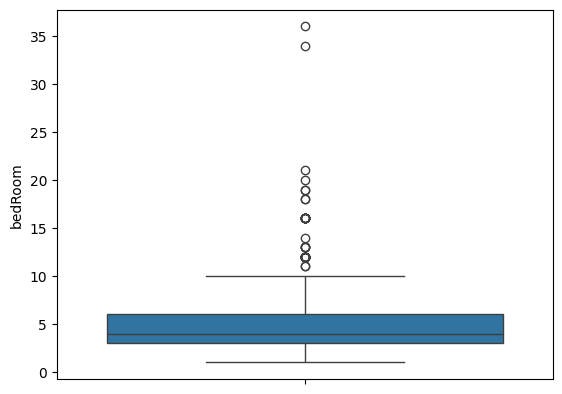

In [14]:
sns.boxplot(df["bedRoom"])

<Axes: ylabel='floorNum'>

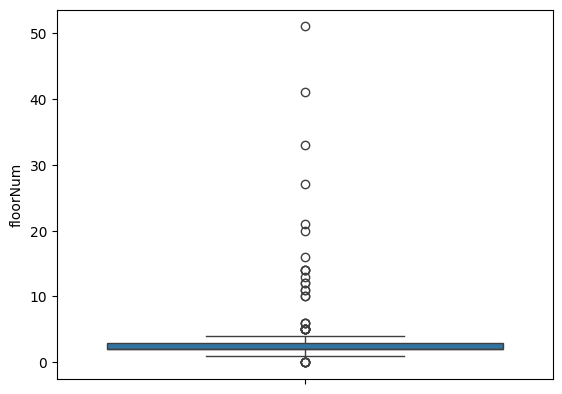

In [15]:
sns.boxplot(df["floorNum"])

<Axes: ylabel='bathroom'>

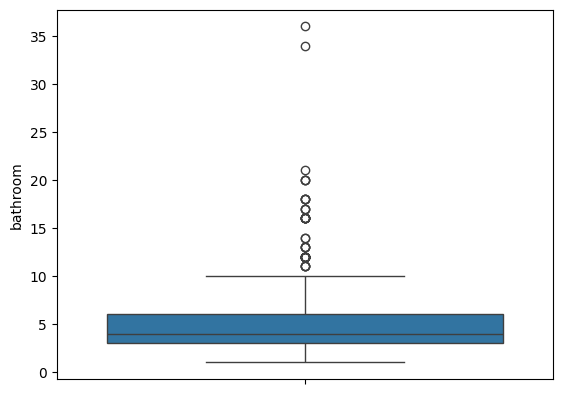

In [16]:
sns.boxplot(df["bathroom"])

<Axes: ylabel='price'>

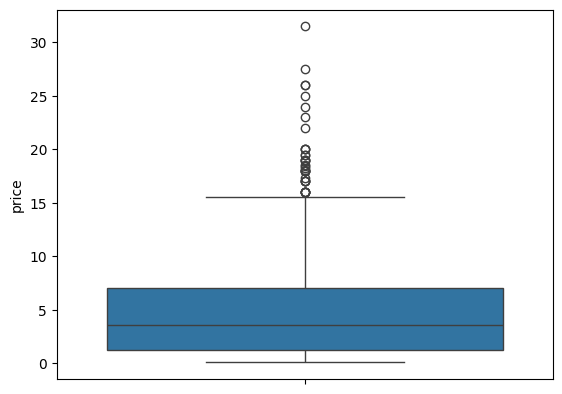

In [17]:
sns.boxplot(df["price"])

<Axes: ylabel='price_per_sqft'>

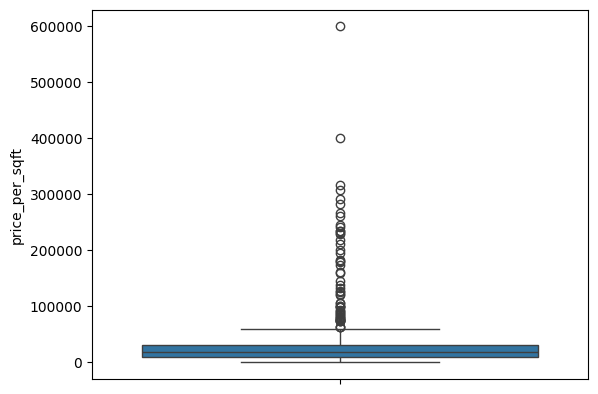

In [18]:
sns.boxplot(df['price_per_sqft'])

In [19]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

columns_to_clean = ["price", "price_per_sqft", "area", "floorNum", "bedRoom", "bathroom"]

cleaned_df = df.copy()

for col in columns_to_clean:
    cleaned_df = remove_outliers_iqr(cleaned_df, col)

cleaned_df.shape

(697, 20)

In [20]:
def remove_outliers_iqr(data, column, threshold=2.0):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

columns_to_clean = ["price", "price_per_sqft", "area", "floorNum", "bedRoom", "bathroom"]

cleaned_df = df.copy()

for col in columns_to_clean:
    cleaned_df = remove_outliers_iqr(cleaned_df, col, threshold=2.0)
    
print(cleaned_df.shape)

(772, 20)


In [21]:
feature_columns = ["price_per_sqft", "area", "floorNum", "bedRoom", "bathroom"]
X = cleaned_df[feature_columns]
y = cleaned_df["price"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2 Score",r2)
print("MSE: ",mse)

R2 Score 0.8152848155667467
MSE:  3.0509044625098376


In [24]:
y_test.values,y_pred

(array([18.5 ,  7.46, 16.  ,  0.48,  6.  ,  2.8 ,  1.18,  1.15,  5.75,
         7.69,  8.5 ,  3.75,  6.21,  1.2 ,  0.35, 10.85,  0.4 ,  3.05,
         6.  ,  2.25,  4.6 ,  0.47,  0.51,  4.3 , 11.  ,  7.1 ,  1.8 ,
         1.95,  7.5 ,  1.7 ,  6.4 ,  3.2 ,  0.82,  3.  ,  5.25,  1.  ,
         5.8 ,  2.75,  6.25, 12.5 ,  2.1 ,  2.5 ,  7.  ,  0.3 ,  2.75,
         0.75,  7.25,  0.53,  9.5 ,  9.25,  0.83,  1.  ,  2.68,  0.34,
        10.55, 16.  ,  2.55, 12.  , 10.5 ,  0.7 ,  1.27,  5.15,  1.1 ,
         0.48,  4.75,  9.8 ,  1.6 ,  7.6 ,  0.47,  2.2 ,  8.6 ,  0.6 ,
         0.45,  3.5 ,  2.5 , 13.5 , 12.5 ,  0.9 ,  3.6 ,  1.5 ,  5.6 ,
         7.25,  6.  ,  6.4 ,  0.99,  4.1 , 11.25,  0.7 ,  3.55,  1.3 ,
         1.39,  1.4 , 12.  , 12.  ,  0.6 ,  8.81, 17.3 ,  0.43,  7.5 ,
         1.6 ,  2.4 ,  0.95,  3.5 ,  0.65,  6.5 ,  2.45,  5.8 ,  0.98,
         8.4 ,  2.9 ,  6.8 , 11.95,  2.5 ,  8.  ,  0.36,  0.95,  7.35,
         4.  ,  1.3 ,  4.7 ,  0.4 ,  1.2 ,  0.89,  2.95,  3.75,  0.95,
      

In [27]:
sample_input = pd.DataFrame([{
    "price_per_sqft": 8000,   # Use reasonable value from dataset
    "area": 1200,             # Square feet
    "floorNum": 5,            
    "bedRoom": 2,
    "bathroom": 2
}])


predicted_price = model.predict(sample_input)
print(f"Predicted price for sample input is: {predicted_price[0]}")


Predicted price for sample input is: 0.4552475793326196
